##### **Błażej Klepacki, 331389**

#### **Polecenie**

Pracę domową (**pojedynczy plik** notatnika z rozszerzeniem .ipynb) należy przesłać za pośrednictwem platformy *MS Teams* (moduł Zadania) do poniedziałku **10 listopada 2025 roku do godziny 9:00**. Przesłanie rozwiązania po terminie skutkuje otrzymaniem 0 punktów za tę pracę domową.

**D1** (*2 punkty*). Rozważmy układ równań Lotki-Volterry (czyli model drapieżnik-ofiara):
$$x' = ax - bxy, \qquad y' = dxy - cy,$$
gdzie $x$ to liczność populacji ofiary, $y$ to liczność populacji drapieżnika. Stwórz pole kierunków i sprawdź, czy możliwe jest symboliczne wyznaczenie rozwiązania tego problemu dla następujących danych:
$$ a = 0{,}4,\quad b = 0{,}002,\quad c = 0{,}7,\quad d = 0{,}001,\quad x(0) = 600,\quad y(0) = 400.$$

**D2** (*2 punkty*). Rozwiąż numerycznie (korzystając z domyślnej wbudowanej metody) układ równań Lotki-Volterry z zadania **D1**, następnie stwórz wykres rozwiązań (zależności $x(t)$ i $y(t)$), a także nanieś na pole kierunków trajektorię rozwiązania.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
sympy.init_printing()

#### **Zadanie D1**

##### 1. Pole kierunków 

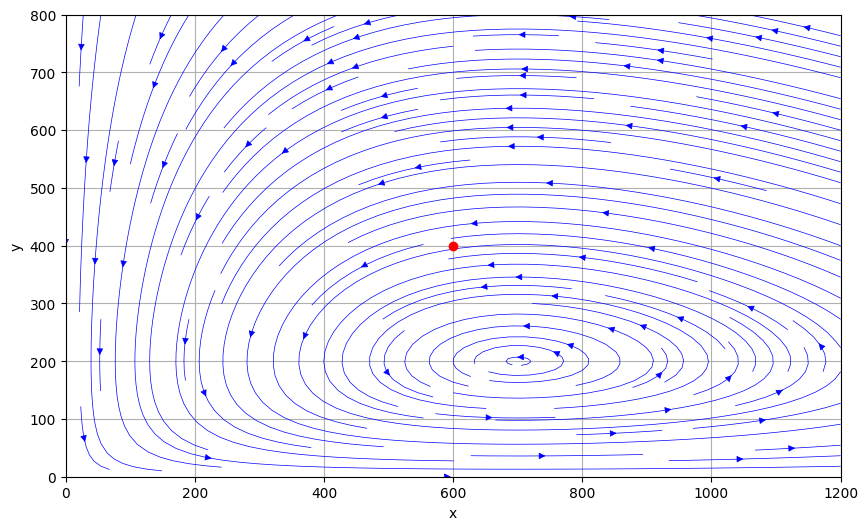

In [46]:
a, b, c, d = 0.4, 0.002, 0.7, 0.001
x0, y0 = 600, 400

x_np = np.linspace(0, 1200, 20)
y_np = np.linspace(0, 800, 20)

X, Y = np.meshgrid(x_np, y_np)
U_val = a*X - b*X*Y
V_val = d*X*Y - c*Y

# wyświetlanie wykresu
plt.figure(figsize=(10, 6))
plt.streamplot(X, Y, U_val, V_val,density=1.5, color='blue', linewidth=0.5)
plt.plot(x0, y0, 'ro')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

##### 2. Symboliczne wyznaczenie rozwiązania

In [ ]:
t = sympy.symbols('t')
a, b, c, d = sympy.symbols('a b c d')
x = sympy.Function('x')(t)
y = sympy.Function('y')(t)

eq1 = sympy.Eq(x.diff(t), a*x - b*x*y)
eq2 = sympy.Eq(y.diff(t), d*x*y - c*y)
uklad_rownan = [eq1, eq2]

ics = {x.subs(t, 0): 600, y.subs(t, 0): 400}

rozwiazanie_ur = sympy.dsolve(uklad_rownan, [x, y], ics=ics)
rozwiazanie_ur

ValueError: Couldn't solve for initial conditions

##### **Wniosek**: próba symbolicznego wyznaczenia rozwiązania naszego układu kończy się zwróconym błędem od SymPy, który nie znajduje jawnej postaci rozwiązania (zarówno przy parametrach ogólnych, jak i po podstawieniu danych liczbowych).

#### **Zadanie D2**

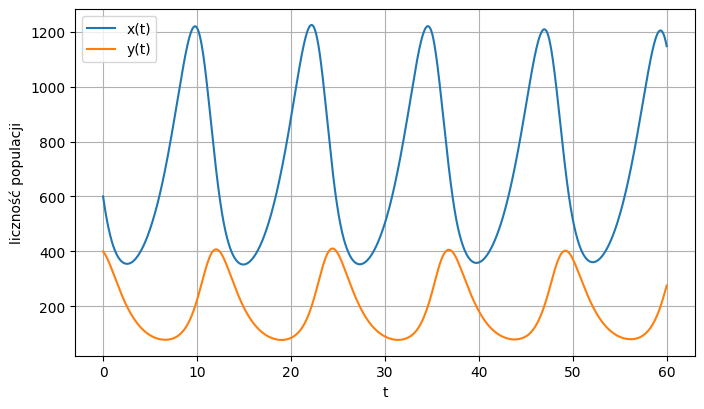

In [51]:
a, b, c, d = 0.4, 0.002, 0.7, 0.001
x0, y0 = 600, 400

def f(t, z):
    x, y = z
    return [a*x - b*x*y, d*x*y - c*y]

t0, t1 = 0.0, 60.0
t_eval = np.linspace(t0, t1, 2000)
ode_sol = integrate.solve_ivp(f, [t0, t1], [x0, y0], t_eval=t_eval)

# wykres
plt.figure(figsize=(8,4.5))
plt.plot(ode_sol.t, ode_sol.y[0], label='x(t)')
plt.plot(ode_sol.t, ode_sol.y[1], label='y(t)')
plt.xlabel('t')
plt.ylabel('liczność populacji')
plt.grid(True)
plt.legend()
plt.show()


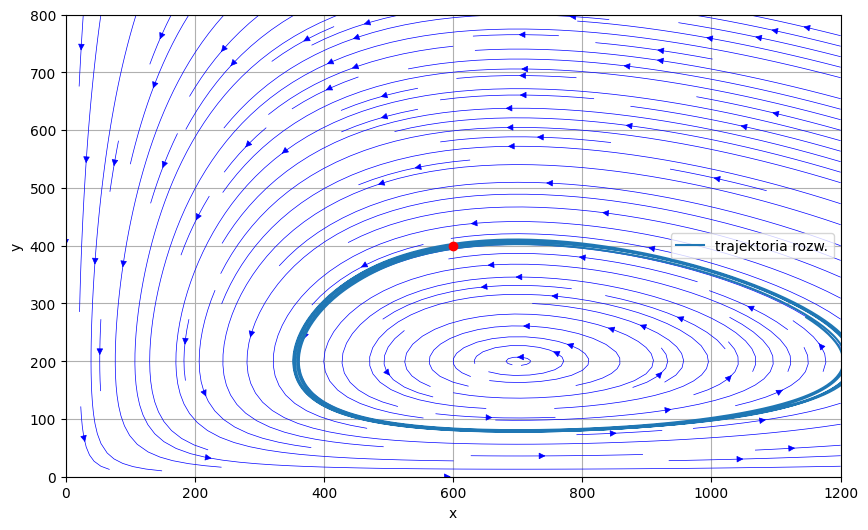

In [56]:
a, b, c, d = 0.4, 0.002, 0.7, 0.001
x0, y0 = 600, 400

x_np = np.linspace(0, 1200, 20)
y_np = np.linspace(0, 800, 20)

X, Y = np.meshgrid(x_np, y_np)
U_val = a*X - b*X*Y
V_val = d*X*Y - c*Y

# wyświetlanie wykresu
plt.figure(figsize=(10, 6))
plt.streamplot(X, Y, U_val, V_val,density=1.5, color='blue', linewidth=0.5)
plt.plot(ode_sol.y[0], ode_sol.y[1], '-', label='trajektoria rozw.')
plt.plot(x0, y0, 'ro')
plt.xlim(0, 1200)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()